# Hands-on exercise

In this simple example you are required to perform a simple linear regression with scipy. Find all the information on the function in the documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

In [1]:
from jupyterthemes import jtplot
jtplot.style('onedork')

In [2]:
import matplotlib.pyplot as plt
import csv
from scipy import stats
import numpy as np
import sklearn as sl
from sklearn import linear_model as lm

In [3]:
# Load the provided .csv file with the used car data

filename = "data/km_year_power_price.csv"
lines = csv.reader(open(filename, newline=''), delimiter=',')
dataset =list(lines)
variables=dataset[0]
dataset=dataset[1:]
dataset=np.array(dataset,float)
dataset


array([[1.250000e+05, 2.001000e+03, 4.000000e+01, 1.371110e+03],
       [1.500000e+05, 2.001000e+03, 4.000000e+01, 1.298700e+03],
       [5.000000e+03, 2.001000e+03, 6.000000e+01, 1.232430e+03],
       ...,
       [2.000000e+04, 2.015000e+03, 2.600000e+02, 4.949238e+04],
       [1.000000e+04, 2.015000e+03, 3.000000e+02, 3.854269e+04],
       [2.000000e+04, 2.015000e+03, 3.000000e+02, 3.968332e+04]])

In [4]:
variables

['km', 'year', 'powerPS', 'avgPrice']

Use a linear regression to estimate the car prices from the year, kilometers or engine power. 
You can make a simple 1D regression from each one of the parameters independently 




In [5]:
# linear regression with linregress (estimate price from year)
ris=stats.linregress(dataset[:,1],dataset[:,3])
print(ris[0],ris[1])

1509.0938253352235 -3018309.484956963


In [6]:
# (Optional) linear regression with linear_model.LinearRegression() (estimate price from year)
reg = lm.LinearRegression().fit(dataset[:,1].reshape(-1,1), dataset[:,3])
print(reg.coef_,reg.intercept_)


[1509.09382534] -3018309.484956955


In [7]:
# linear regression with least squares (estimate price from year)
# You should get exactly the same solution of linregress !
x1=np.array([[1,i] for i in dataset[:,1]])
A=np.dot(np.matrix.transpose(x1),x1)
b=np.dot(np.matrix.transpose(x1),dataset[:,3])
coeffs=np.dot(np.linalg.inv(A),b)
print(coeffs)

[-3.01830948e+06  1.50909383e+03]


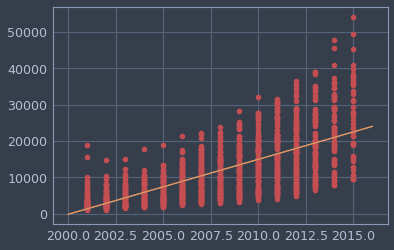

In [8]:
# Plot the data and the lines representing the output of the linregress and least square algorithms

plt.plot(dataset[:,1],dataset[:,3],'ro')
x=np.linspace(2000,2016)
y=ris[0]*x+ris[1]
y1=reg.coef_*x+reg.intercept_
y2=coeffs[1]*x+coeffs[0]
plt.plot(x,y,'g')
plt.plot(x,y1,'b')
plt.plot(x,y2,'y')

In [9]:
# linear regression with linregress (estimate price from power)

ris2=stats.linregress(dataset[:,2],dataset[:,3])
print(ris2[0],ris2[1])

90.33080718820236 -1303.9126989880006


In [10]:
# linear regression with linregress (estimate price from km)

ris3=stats.linregress(dataset[:,0],dataset[:,3])
print(ris2[0],ris2[1])

90.33080718820236 -1303.9126989880006


In [11]:
# Have a look at the correlation coefficients to see which of the 3 features works better
print("Correlation coefficient for Year: ",ris[2],"Power: ",ris2[2],"Km: ",ris3[2])
print("Good correlation for the power")

Correlation coefficient for Year:  0.6767043169095447 Power:  0.708550031526397 Km:  -0.2572867429988496
Good correlation for the power


[1325.2284004    80.43004469] -2661196.7867490062


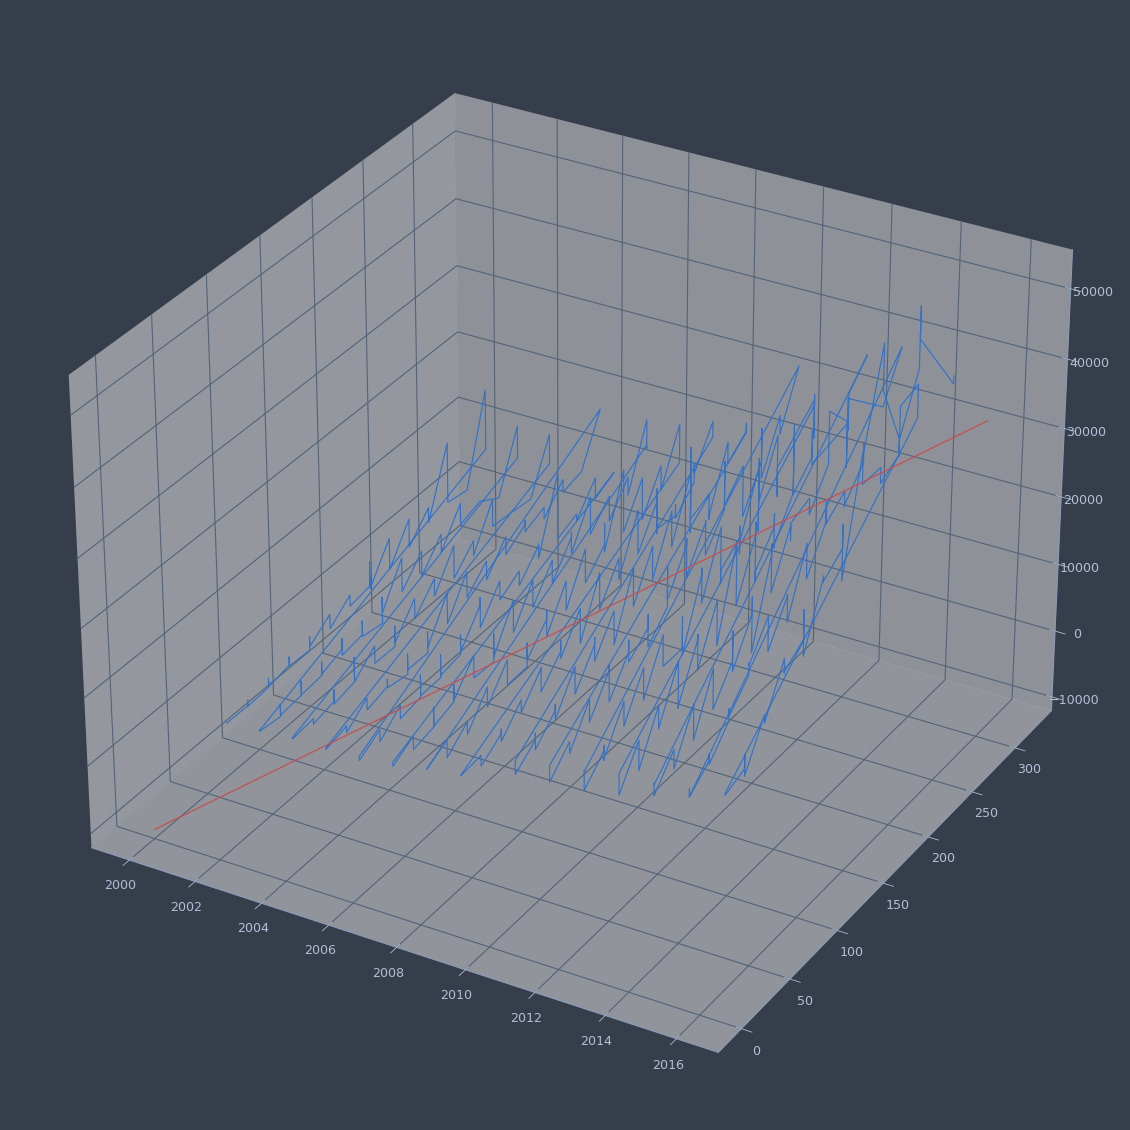

In [19]:
# Optional : 2D linear regression with linear model (estimate price from year and power)

x2D=np.array([[x,dataset[i,2]] for i,x in enumerate(dataset[:,1])])
y2D=dataset[:,3]
reg = lm.LinearRegression().fit(x2D,y2D )
print(reg.coef_,reg.intercept_)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(20,30))
ax = fig.add_subplot(111, projection='3d')
ax.plot(list(x2D[:,0]),list(x2D[:,1]),zs=list(y2D))
xplt=np.linspace(2000,2016)
yplt=np.linspace(0,300)
zplt=reg.coef_[0]*xplt+reg.coef_[1]*yplt+reg.intercept_
ax.plot(xplt,yplt,zplt, color='r')